<a href="https://colab.research.google.com/github/abhirbhandary/Python/blob/main/1_Time_Series_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### 1. Install Pandas Data Reader -> Financial Data

Pandas Data Reader is a subpackage of the popular Python data manipulation library called pandas. It provides a convenient interface to fetch financial and economic data from various online sources directly into a pandas DataFrame. The primary use case is to easily retrieve and work with time-series data, particularly financial market data, such as stock prices, economic indicators, and more.

In [ ]:
## Install Pandas Data Reader
!pip install pandas-datareader

In [33]:
import pandas_datareader as pdr
import pandas as pd
from datetime import datetime

In [ ]:
# In 2024 pdr.get_data_yahoo('TSLA') doesnot work use this instead
import yfinance as yf

In [ ]:
# pdr.get_data_yahoo('TSLA')

In [ ]:
df = yf.download('TSLA')

In [11]:
df.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2024-02-05,184.259995,184.679993,175.009995,181.059998,181.059998,134294400
2024-02-06,177.210007,186.490005,177.110001,185.100006,185.100006,122676000
2024-02-07,188.179993,189.789993,182.679993,187.580002,187.580002,111535200
2024-02-08,189.000000,191.619995,185.580002,189.559998,189.559998,83034000
2024-02-09,190.179993,194.119995,189.479996,193.570007,193.570007,84327600


### 2. Plotting the Data

In [ ]:
df['High'].plot(figsize=(12,4))

In [ ]:
## xlimit and y limit
df['High'].plot(xlim=['2023-01-01','2024-02-01'],figsize=(12,4))

In [ ]:
## xlimit and y limit
df['High'].plot(xlim=['2023-01-01','2024-02-01'],ylim=[0,500],figsize=(12,4))

In [ ]:
## xlimit and y limit and coloring
df['High'].plot(xlim=['2020-01-01','2021-09-01'],ylim=[0,500],figsize=(12,4),ls='--',c='green')

### 3. Date Time Index

In [19]:
df.index

DatetimeIndex(['2010-06-29', '2010-06-30', '2010-07-01', '2010-07-02',
               '2010-07-06', '2010-07-07', '2010-07-08', '2010-07-09',
               '2010-07-12', '2010-07-13',
               ...
               '2024-01-29', '2024-01-30', '2024-01-31', '2024-02-01',
               '2024-02-02', '2024-02-05', '2024-02-06', '2024-02-07',
               '2024-02-08', '2024-02-09'],
              dtype='datetime64[ns]', name='Date', length=3428, freq=None)

In [20]:
index=df.loc['2023-01-01':'2024-02-01'].index
share_open=df.loc['2023-01-01':'2024-02-01']['Open']

In [ ]:
index

In [23]:
import matplotlib.pyplot as plt

In [ ]:
plt.plot(share_open)

### 4. Time Resampling

In [35]:
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-06-29,1.266667,1.666667,1.169333,1.592667,1.592667,281494500
2010-06-30,1.719333,2.028000,1.553333,1.588667,1.588667,257806500
2010-07-01,1.666667,1.728000,1.351333,1.464000,1.464000,123282000
2010-07-02,1.533333,1.540000,1.247333,1.280000,1.280000,77097000
2010-07-06,1.333333,1.333333,1.055333,1.074000,1.074000,103003500


In [ ]:
##year end frequency
df.resample(rule='A').min()

In [ ]:
df.resample(rule='A').max()

In [ ]:
df.resample(rule='A').max()['Open'].plot()

In [ ]:
##quaterly start frequency
##https://towardsdatascience.com/resample-function-of-pandas-79b17ec82a78
df.resample(rule='QS').max()['High'].plot()

In [ ]:
##Business End Frequency
##https://towardsdatascience.com/resample-function-of-pandas-79b17ec82a78
df.resample(rule='BA').max()

In [ ]:
##plotting
df['Open'].resample(rule='A').mean().plot(kind='bar')

### 5. Rolling and Expanding

The rolling method is used for rolling window calculations, commonly used for time-series data in pandas.



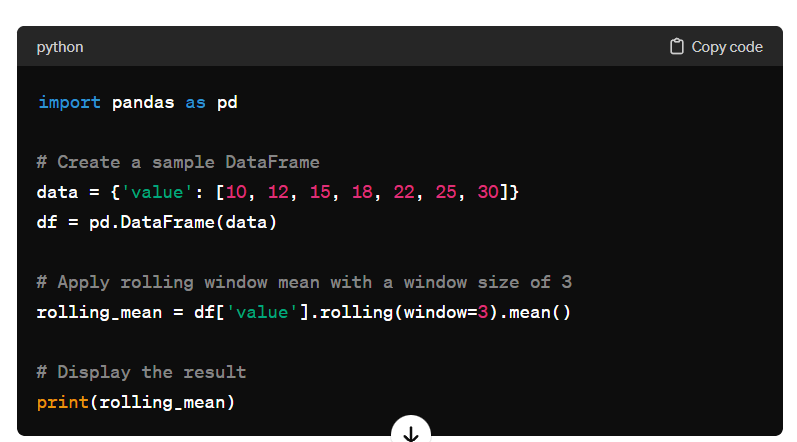

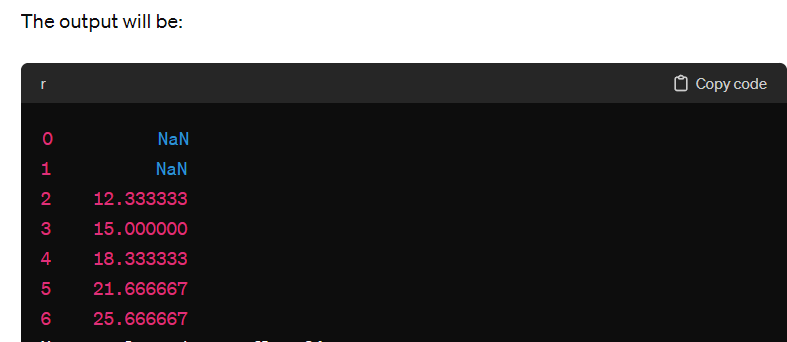


Display the result
print(rolling_mean)
Now, let's break down the calculation:

First Window (index 0-2):

Mean of [10, 12, 15] = (10 + 12 + 15) / 3 = 37 / 3 ≈ 12.333333
Result for index 2: 12.333333

Second Window (index 1-3):

Mean of [12, 15, 18] = (12 + 15 + 18) / 3 = 45 / 3 = 15.0
Result for index 3: 15.0

In [42]:
df['High'].rolling(10).max().head(20)

Date
2010-06-29         NaN
2010-06-30         NaN
2010-07-01         NaN
2010-07-02         NaN
2010-07-06         NaN
2010-07-07         NaN
2010-07-08         NaN
2010-07-09         NaN
2010-07-12         NaN
2010-07-13    2.028000
2010-07-14    2.028000
2010-07-15    1.728000
2010-07-16    1.540000
2010-07-19    1.483333
2010-07-20    1.483333
2010-07-21    1.483333
2010-07-22    1.483333
2010-07-23    1.483333
2010-07-26    1.483333
2010-07-27    1.483333
Name: High, dtype: float64

In [43]:
df['Open:30 days rolling']=df['Open'].rolling(30).mean()

<Axes: xlabel='Date'>

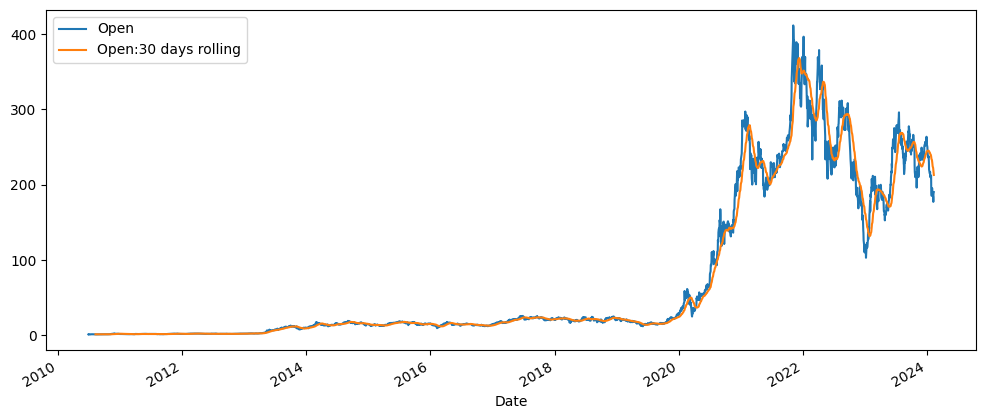

In [44]:
df[['Open','Open:30 days rolling']].plot(figsize=(12,5))

 rolling focuses on analyzing data within a fixed-size window that moves through the time series, while expanding considers all data points up to the current position, creating an expanding window. The choice between the two depends on the specific analysis or trend identification you are looking to achieve in your time-series data.